In [1]:
import post_hoc as ph
import pandas as pd

# Ejemplo tabla 4.10 Tesis Jose

In [2]:
jose_4_10 = pd.read_csv('4_10_table_JOSE.csv')
jose_4_10.head()

,Dataset,Random Forest,G-Forest,GAR-Forest
0,abalone,24.42,25.02,24.81
1,anneal,99.15,98.84,98.64
2,audiology,74.78,76.19,76.55
3,autos,76.40,73.08,75.03
4,balance-scale,84.32,86.72,85.41


**1 vs ALL**

In [3]:
df_Hoch, avg_rank = ph.posthoc_Friedman_Davenport_Hochbertest(jose_4_10, control='Random Forest') 

### Experimento
# Number of classifiers: 3
# Number of datasets: 62
# Name of classifiers: Random Forest, G-Forest, GAR-Forest
# Alpha: 0.05

### Métricas
# Test de Friedman sobre métricas 
	-> p-val: 0.0346

### Rankings
# GAR-Forest    ranking medio:  1.75
# G-Forest      ranking medio:  2.048
# Random Forest ranking medio:  2.202
# Test de Ivan-Davenport sobre Rankings [F(3.3966, 2, 122)]               
	-> p-val: 0.0367

### Test Hochberg Comparacion Random Forest vs all
# Tabla de comparación de Rankings:
                                 z      p  alpha/i    sig
Random Forest vs GAR-Forest  2.517  0.012    0.025   True
Random Forest vs G-Forest    0.857  0.391    0.050  False


In [4]:
df_Hoch

,z,p,alpha/i,sig
Random Forest vs GAR-Forest,2.517,0.012,0.025,True
Random Forest vs G-Forest,0.857,0.391,0.050,False


In [5]:
avg_rank

{'Random Forest': 2.202, 'G-Forest': 2.048, 'GAR-Forest': 1.75}

### All vs All Nemenyi

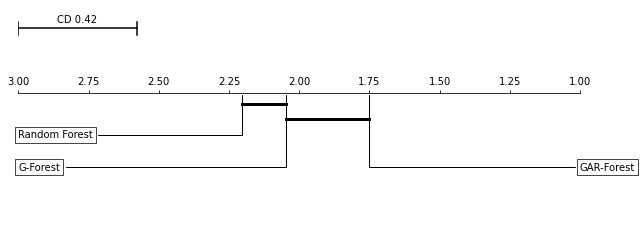

[['Random Forest', 'G-Forest'], ['G-Forest', 'GAR-Forest']]

In [6]:
n_dt = jose_4_10.shape[0]
n_clf = jose_4_10.shape[1]-1 #Columna de datasets
g = ph.groups_Nemenyi(avg_rank, ph.nemenyi_CD(n_clf, n_dt, alpha=0.05))
ph.plot_nemenyi(avg_rank,ph.nemenyi_CD(n_clf, n_dt, alpha=0.05),g)
g

*******************
# Ejemplo Demsar 2016

In [7]:
demsar = pd.read_csv('demsar_2016.csv')
demsar.head()

,Dataset,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult,0.763,0.768,0.771,0.798
1,breastcancer,0.599,0.591,0.590,0.569
2,breastcancerwisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.890


In [8]:
df_Hoch, avg_rank = ph.posthoc_Friedman_Davenport_Hochbertest(demsar)

### Experimento
# Number of classifiers: 4
# Number of datasets: 14
# Name of classifiers: C4.5, C4.5+m, C4.5+cf, C4.5+m+cf
# Alpha: 0.05

### Métricas
# Test de Friedman sobre métricas 
	-> p-val: 0.0120

### Rankings
# C4.5+m+cf ranking medio:  1.929
# C4.5+m    ranking medio:  2.0
# C4.5+cf   ranking medio:  2.929
# C4.5      ranking medio:  3.143
# Test de Ivan-Davenport sobre Rankings [F(3.9867, 3, 39)]               
	-> p-val: 0.0144

### Test Hochberg Comparacion C4.5+m+cf vs all
# Tabla de comparación de Rankings:
                          z      p  alpha/i    sig
C4.5+m+cf vs C4.5     2.488  0.013    0.017   True
C4.5+m+cf vs C4.5+cf  2.049  0.040    0.025  False
C4.5+m+cf vs C4.5+m   0.146  0.884    0.050  False


### 1 vs ALL

In [9]:
df_Hoch, avg_rank = ph.posthoc_Friedman_Davenport_Hochbertest(demsar, control='C4.5')

### Experimento
# Number of classifiers: 4
# Number of datasets: 14
# Name of classifiers: C4.5, C4.5+m, C4.5+cf, C4.5+m+cf
# Alpha: 0.05

### Métricas
# Test de Friedman sobre métricas 
	-> p-val: 0.0120

### Rankings
# C4.5+m+cf ranking medio:  1.929
# C4.5+m    ranking medio:  2.0
# C4.5+cf   ranking medio:  2.929
# C4.5      ranking medio:  3.143
# Test de Ivan-Davenport sobre Rankings [F(3.9867, 3, 39)]               
	-> p-val: 0.0144

### Test Hochberg Comparacion C4.5 vs all
# Tabla de comparación de Rankings:
                       z      p  alpha/i    sig
C4.5 vs C4.5+m+cf  2.488  0.013    0.017   True
C4.5 vs C4.5+m     2.342  0.019    0.025   True
C4.5 vs C4.5+cf    0.439  0.661    0.050  False


In [10]:
df_Hoch

,z,p,alpha/i,sig
C4.5 vs C4.5+m+cf,2.488,0.013,0.017,True
C4.5 vs C4.5+m,2.342,0.019,0.025,True
C4.5 vs C4.5+cf,0.439,0.661,0.050,False


In [11]:
avg_rank

{'C4.5': 3.143, 'C4.5+m': 2.0, 'C4.5+cf': 2.929, 'C4.5+m+cf': 1.929}

### All vs All

In [12]:
n_dt = demsar.shape[0]
n_clf = demsar.shape[1]-1 #Columna de datasets
n_dt, n_clf

(14, 4)

In [13]:
g = ph.groups_Nemenyi(avg_rank, ph.nemenyi_CD(n_clf, n_dt, alpha=0.10))
g

[['C4.5', 'C4.5+cf'], ['C4.5+cf', 'C4.5+m', 'C4.5+m+cf']]

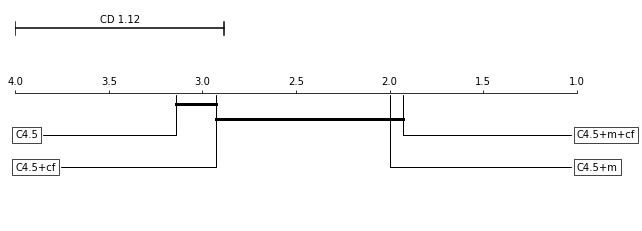

In [14]:
ph.plot_nemenyi(avg_rank,ph.nemenyi_CD(n_clf, n_dt, alpha=0.10),g)

0.05

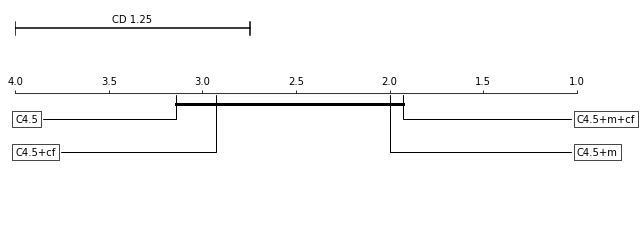

In [15]:
ph.plot_nemenyi(avg_rank,
                ph.nemenyi_CD(n_clf, n_dt, alpha=0.05),
                ph.groups_Nemenyi(avg_rank, ph.nemenyi_CD(n_clf, n_dt, alpha=0.05)))

## Resultados nuestros

In [16]:
embbeding_auc_norm = pd.read_csv('res_auc_embbedings_norm_clf.csv')
embbeding_auc_norm.head()

,Dataset,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
0,RT_Embedding,0.832000,0.590000,0.642000,0.792000,0.750000,0.620000,0.430000,0.704000,0.864000,0.888000
1,A_Embedding,0.740975,0.587619,0.752596,0.723646,0.781323,0.794465,0.496667,0.811433,0.792358,0.811039
2,E_Embedding,0.687884,0.567857,0.625180,0.684975,0.655927,0.707916,0.555714,0.736542,0.750295,0.752932
3,I_Embedding,0.748180,0.578956,0.674691,0.704053,0.686239,0.547093,0.483590,0.646677,0.713111,0.727734
4,O_Embedding,0.640557,0.553800,0.608481,0.647351,0.644576,0.639483,0.492857,0.682911,0.637884,0.671548


**1 vs ALL**

In [17]:
df_Hoch, avg_rank = ph.posthoc_Friedman_Davenport_Hochbertest(embbeding_auc_norm)

### Experimento
# Number of classifiers: 10
# Number of datasets: 6
# Name of classifiers: KNN8, Tree, Bayes, SVM, RandomF, Ada, Reglas, GBC, MLP100, MLP10
# Alpha: 0.05

### Métricas
# Test de Friedman sobre métricas 
	-> p-val: 0.0000

### Rankings
# MLP10   ranking medio:  1.833
# GBC     ranking medio:  3.167
# MLP100  ranking medio:  3.333
# KNN8    ranking medio:  4.167
# SVM     ranking medio:  5.167
# RandomF ranking medio:  5.667
# Ada     ranking medio:  5.833
# Bayes   ranking medio:  7.0
# Tree    ranking medio:  8.833
# Reglas  ranking medio:  10.0
# Test de Ivan-Davenport sobre Rankings [F(12.7208, 9, 45)]               
	-> p-val: 0.0000

### Test Hochberg Comparacion MLP10 vs all
# Tabla de comparación de Rankings:
                      z      p  alpha/i    sig
MLP10 vs Reglas   4.672  0.000    0.006   True
MLP10 vs Tree     4.005  0.000    0.006   True
MLP10 vs Bayes    2.956  0.003    0.007   True
MLP10 vs Ada      2.288  0.022    0.008  False
MLP10 vs RandomF  2.193 

In [18]:
df_Hoch

,z,p,alpha/i,sig
MLP10 vs Reglas,4.672,0.000,0.006,True
MLP10 vs Tree,4.005,0.000,0.006,True
MLP10 vs Bayes,2.956,0.003,0.007,True
MLP10 vs Ada,2.288,0.022,0.008,False
MLP10 vs RandomF,2.193,0.028,0.010,False
MLP10 vs SVM,1.907,0.056,0.012,False
MLP10 vs KNN8,1.335,0.182,0.017,False
MLP10 vs MLP100,0.858,0.391,0.025,False
MLP10 vs GBC,0.763,0.445,0.050,False


In [19]:
avg_rank

{'KNN8': 4.167,
 'Tree': 8.833,
 'Bayes': 7.0,
 'SVM': 5.167,
 'RandomF': 5.667,
 'Ada': 5.833,
 'Reglas': 10.0,
 'GBC': 3.167,
 'MLP100': 3.333,
 'MLP10': 1.833}

**All vs All**

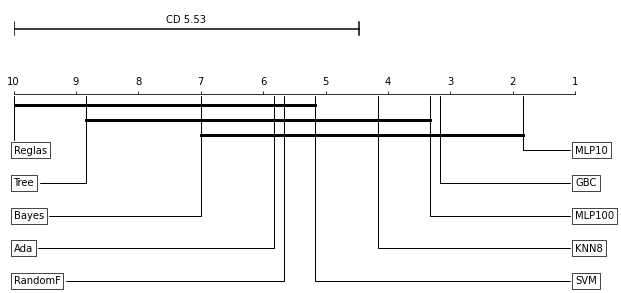

[['Reglas', 'Tree', 'Bayes', 'Ada', 'RandomF', 'SVM'],
 ['Tree', 'Bayes', 'Ada', 'RandomF', 'SVM', 'KNN8', 'MLP100'],
 ['Bayes', 'Ada', 'RandomF', 'SVM', 'KNN8', 'MLP100', 'GBC', 'MLP10']]

In [20]:
n_dt = embbeding_auc_norm.shape[0]
n_clf = embbeding_auc_norm.shape[1]-1 #Columna de datasets
g = ph.groups_Nemenyi(avg_rank, ph.nemenyi_CD(n_clf, n_dt, alpha=0.05))
ph.plot_nemenyi(avg_rank,ph.nemenyi_CD(n_clf, n_dt, alpha=0.05),g)
g

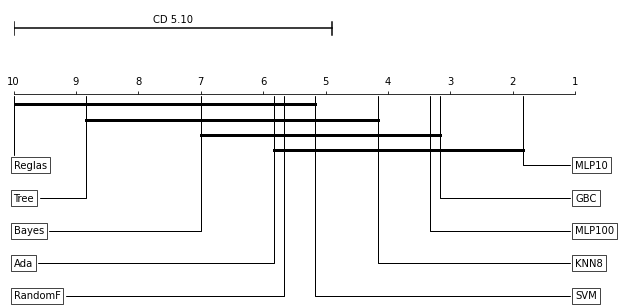

[['Reglas', 'Tree', 'Bayes', 'Ada', 'RandomF', 'SVM'],
 ['Tree', 'Bayes', 'Ada', 'RandomF', 'SVM', 'KNN8'],
 ['Bayes', 'Ada', 'RandomF', 'SVM', 'KNN8', 'MLP100', 'GBC'],
 ['Ada', 'RandomF', 'SVM', 'KNN8', 'MLP100', 'GBC', 'MLP10']]

In [21]:
g = ph.groups_Nemenyi(avg_rank, ph.nemenyi_CD(n_clf, n_dt, alpha=0.10))
ph.plot_nemenyi(avg_rank,ph.nemenyi_CD(n_clf, n_dt, alpha=0.10),g)
g